# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [12]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 137MB/s]


In [13]:
!unzip /content/perros_y_gatos.zip > /dev/null

replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [9]:
cd /content

/content


In [15]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


Link : https://keras.io/preprocessing/image/

In [47]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 20

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


['cats/cat.1.jpg', 'cats/cat.10.jpg', 'cats/cat.100.jpg', 'cats/cat.1000.jpg', 'cats/cat.101.jpg']
Data tensor shape:  (20, 150, 150, 3)
Target tensor shape:  (20,)


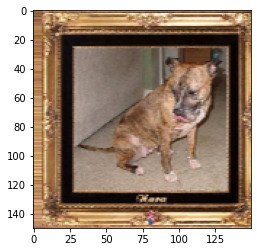

In [46]:
# visualizamos los nombres de algunos archivos de train
print(train_generator.filenames[:5])

# visualizamos algunas imagenes, la dimension debe coincidir con el batch size
images, label = next(train_generator)

print('Data tensor shape: ', images.shape)
print('Target tensor shape: ',label.shape)

plt.imshow(images[0])
train_generator.reset()


In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [ ]:
model = models.Sequential()

#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2), strides = 2))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides = 2))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides = 2))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides = 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# utilizar model.fit_generator para entrenar
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 52s 93ms/step - loss: 0.6911 - acc: 0.5277 - val_loss: 0.6617 - val_acc: 0.6110
Epoch 2/15
100/100 [==============================] - 8s 85ms/step - loss: 0.6591 - acc: 0.6180 - val_loss: 0.6392 - val_acc: 0.6240
Epoch 3/15
100/100 [==============================] - 8s 85ms/step - loss: 0.6087 - acc: 0.6773 - val_loss: 0.6287 - val_acc: 0.6540
Epoch 4/15
100/100 [==============================] - 9s 95ms/step - loss: 0.5727 - acc: 0.7067 - val_loss: 0.5928 - val_acc: 0.6900
Epoch 5/15
100/100 [==============================] - 8s 85ms/step - loss: 0.5415 - acc: 0.7342 - val_loss: 0.6249 - val_acc: 0.6580
Epoch 6/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5311 - acc: 0.7303 - val_loss: 0.6068 - val_acc: 0.6620
Epoch 7/15
100/100 [==============================] - 8s 85ms/step - loss: 0.4861 - acc: 0.7744 - val_loss: 0.6655 - val_acc: 0.6440
Epoch 8/15
100/100 [==============================] - 8s 85ms/step -

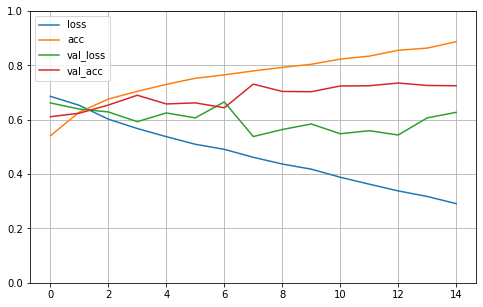

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.0, 1)
plt.show()

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 

1.   Elemento de lista
2.   Elemento de lista


![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True)
    #rotation_range=30,
    #width_shift_range=[-50,50],
    #brightness_range = [5,50])
    #zoom_range = [0.0, 0.3])

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [ ]:
# iterator

# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
#### COMPLETAR #####
### usar el mismo modelo de antes

# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea

model_aug = models.Sequential()

model_aug.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model_aug.add(layers.MaxPooling2D((2,2), strides = 2))
model_aug.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2), strides = 2))
model_aug.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2),strides = 2))
model_aug.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2), strides = 2))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_aug.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/15
100/100 [==============================] - 10s 89ms/step - loss: 0.6915 - acc: 0.5273 - val_loss: 0.6885 - val_acc: 0.5280
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.6658 - acc: 0.6179 - val_loss: 0.6386 - val_acc: 0.6450
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 0.6209 - acc: 0.6591 - val_loss: 0.6154 - val_acc: 0.6620
Epoch 4/15
100/100 [==============================] - 9s 87ms/step - loss: 0.5916 - acc: 0.6777 - val_loss: 0.5995 - val_acc: 0.6800
Epoch 5/15
100/100 [==============================] - 9s 86ms/step - loss: 0.5637 - acc: 0.7037 - val_loss: 0.5955 - val_acc: 0.6770
Epoch 6/15
100/100 [==============================] - 8s 85ms/step - loss: 0.5604 - acc: 0.7175 - val_loss: 0.6631 - val_acc: 0.6410
Epoch 7/15
100/100 [==============================] - 9s 87ms/step - loss: 0.5319 - acc: 0.7407 - val_loss: 0.5967 - val_acc: 0.6880
Epoch 8/15
100/100 [==============================] - 10s 96ms/step 

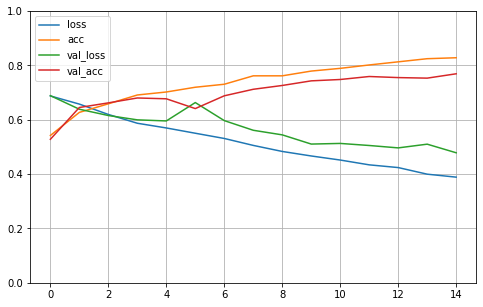

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
keras.backend.clear_session
del model

# Conclusiones

Se re-entreno el modelo con data augmentation. Algunas transformaciones dieron resultados contrarios a los esperados i.e. disminucion de precision en las metricas de desempeño. Hay que tener mucho cuido en que transformaciones de data augmentation elgir para no perjudicar el dataset.

La transformacion con la cual se obtuvo el mejor resultado fue 

```
horizontal_flip 
```

pero aun asi no se llego a igualar la precision del modelo entrenado sin data augmentation.

Una explicacion a esto es que el dataset es lo suficientemente balanceado y completo con lo cual el aplicarle data augmentation no aporta mucho en el resultado final.

Algunas de las transformaciones utilizadas que dieron malos resultados.

```
rotation_range=50,
brightness_range = (5,50),
zoom_range = 0.3
``` 






